In [8]:
import numpy as np # для матричных вычислений
import pandas as pd # для анализа и предобработки данных
import matplotlib.pyplot as plt # для визуализации
import seaborn as sns # для визуализации

%matplotlib inline
plt.style.use('seaborn')

from sklearn.cluster import KMeans # импортируем sklearn для кластеризации

### Задание 5.4

Скачайте датасет, в котором представлены цены на однокомнатные квартиры и возраст этих квартир. 

Проведите кластеризацию GMM, используя два признака: цену и возраст квартир. 

Какое оптимальное количество кластеров получилось?

In [9]:
data = pd.read_csv('data/housing.zip')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1355 entries, 0 to 1354
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    1355 non-null   float64
 1   price   1355 non-null   float64
dtypes: float64(2)
memory usage: 21.3 KB


In [11]:
data

,year,price
0,0.081091,23.790515
1,9.483270,10.784598
2,9.901805,10.003782
3,1.930438,21.879849
4,1.618601,21.851806
...,...,...
1350,12.580032,10.122039
1351,12.488949,9.934954
1352,10.693618,12.083653
1353,12.455530,10.304081


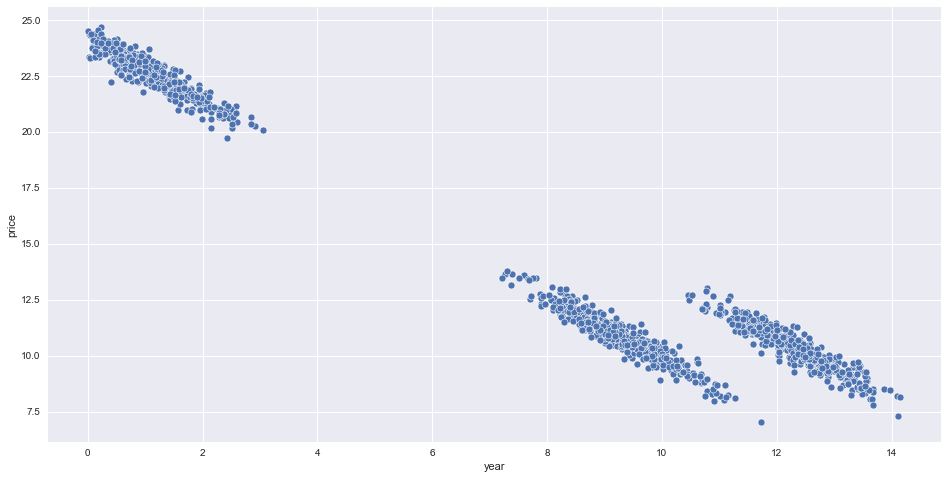

In [12]:
# Визуализирую данные
X = data

fig, ax = plt.subplots(figsize=(16, 8))
sns.scatterplot(data = X, x='year', y='price', ax=ax)
plt.show()

Визуально, очевидно наличие 3х кластеров элиптической формы.

Тут нужно использовать модель гауссовой смеси (Gaussian Mixture Model, GMM)

In [13]:
from sklearn.mixture import GaussianMixture

gm_clustering = GaussianMixture(n_components=3, random_state=42)

# обучаем модель 
gm_clustering.fit(X)

# для матрицы X получаем предсказания, к какому кластеру принадлежат объекты
gm_prediction = gm_clustering.predict(X)

data['cluster'] = gm_prediction

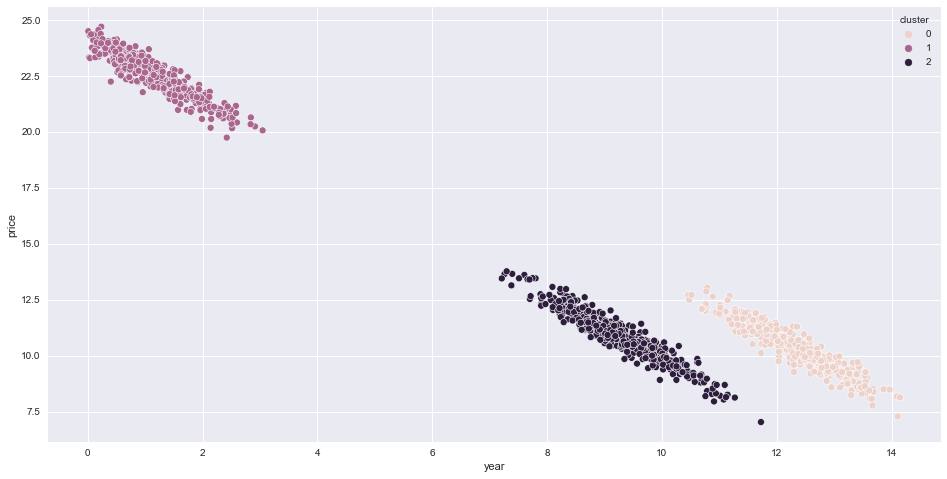

In [14]:
# Визуализирую данные c выделением кластеров
X = data

fig, ax = plt.subplots(figsize=(16, 8))
sns.scatterplot(data = X, x='year', y='price', hue='cluster', ax=ax)
plt.show()

In [15]:
# инициализируем алгоритм k-means, с количеством кластеров 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(X)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)

# если мы хотим метки класса для тех же данных, на которых обучили модель, то можно просто попросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
data['cluster_kmeans'] = predictions

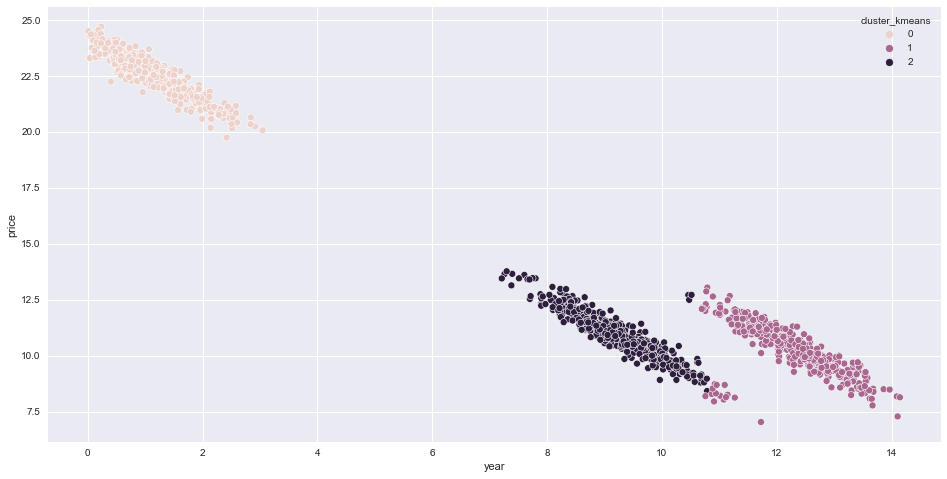

In [16]:
# Визуализирую данные c выделением кластеров
X = data

fig, ax = plt.subplots(figsize=(16, 8))
sns.scatterplot(data = X, x='year', y='price', hue='cluster_kmeans', ax=ax)
plt.show()

kmeans не справился с кластеризацией так же хорошо как GMM